# Probablity Distribution

## Discrete Distribution

* **bernoulli** A Bernoulli discrete random variable.
* **binom** A binomial discrete random variable. 
* **boltzmann** A Boltzmann (Truncated Discrete Exponential) random variable. 
* **dlaplace** A Laplacian discrete random variable. 
* **geom** A geometric discrete random variable. 
* **hypergeom** A hypergeometric discrete random variable. 
* **logser** A Logarithmic (Log-Series, Series) discrete random variable. 
* **nbinom** A negative binomial discrete random variable. 
* **planck** A Planck discrete exponential random variable. 
* **poisson** A Poisson discrete random variable. 
* **randint** A uniform discrete random variable. 
* **skellam** A Skellam discrete random variable. 
* **zipf** A Zipf discrete random variable.

### Binomial Distribution

A binomial discrete random variable.

As an instance of the **rv_discrete** class, **binom** object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

#### Notes
------
The probability mass function for **binom** is:

$$f(k) = \binom{n}{k} p^k (1-p)^{n-k}$$

for `k` in `{0, 1,..., n}`.

**binom** takes n and p as shape parameters.

The probability mass function above is defined in the “standardized” form. To shift distribution use the loc parameter. Specifically, `binom.pmf(k, n, p, loc)` is identically equivalent to `binom.pmf(k - loc, n, p)`.

In [2]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 10, 0.2
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

<Figure size 640x480 with 1 Axes>

Check accuracy of cdf and ppf:

In [3]:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

Generate random numbers:

In [4]:
r = binom.rvs(n, p, size=1000)

### Poisson Distribution

A Poisson discrete random variable.

As an instance of the **rv_discrete** class, **poisson** object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

#### Notes
------
The probability mass function for **poisson** is:

$$f(k)=\exp⁡(−\mu)\frac{mu^k}{k!}$$

for k≥0.

**poisson** takes $\mu$ as shape parameter.

The probability mass function above is defined in the “standardized” form. To shift distribution use the `loc` parameter. Specifically, `poisson.pmf(k, mu, loc)` is identically equivalent to `poisson.pmf(k - loc, mu)`.


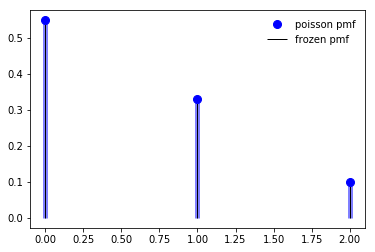

In [5]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
#Calculate a few first moments:
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
#Display the probability mass function(`pmf`):
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
#Alternatively, the distribution object can be called (as a function)
#to fix the shape and location. This returns a “frozen” RV object holding
#the given parameters fixed. Freeze the distribution and display the frozen `pmf`:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

Check accuracy of cdf and ppf:

In [6]:
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

Generate random numbers:

In [7]:
r = poisson.rvs(mu, size=1000)

### Hypergeom Distribution

A hypergeometric discrete random variable.

The hypergeometric distribution models drawing objects from a bin. M is the total number of objects, n is total number of Type I objects. The random variate represents the number of Type I objects in N drawn without replacement from the total population.

As an instance of the rv_discrete class, hypergeom object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

#### Notes
------
The symbols used to denote the shape parameters (M, n, and N) are not universally accepted. See the Examples for a clarification of the definitions used here.

The probability mass function is defined as,
$$p(k, M, n, N) = \frac{\binom{n}{k} \binom{M - n}{N - k}}
{\binom{M}{N}}$$

for$(k \in [\max(0, N - M + n), \min(n, N)]$ , where the binomial coefficients are defined as,
$$\binom{n}{k} \equiv \frac{n!}{k! (n - k)!}.$$

The probability mass function above is defined in the “standardized” form. To shift distribution use the `loc` parameter. Specifically, `hypergeom.pmf(k, M, n, N, loc)` is identically equivalent to `hypergeom.pmf(k - loc, M, n, N)`.

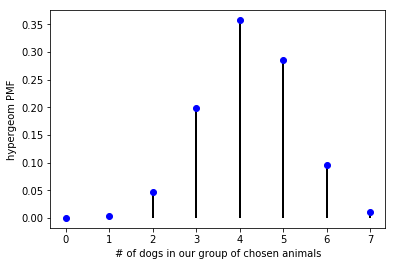

In [8]:
from scipy.stats import hypergeom
import numpy as np
import matplotlib.pyplot as plt
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

Instead of using a frozen distribution we can also use hypergeom methods directly. To for example obtain the cumulative distribution function, use:

In [9]:
prb = hypergeom.cdf(x, M, n, N)

And to generate random numbers:

In [10]:
R = hypergeom.rvs(M, n, N, size=10)

In [11]:
print(R)

[5 4 5 5 3 4 2 5 4 4]
